# Characteristic Treatment of 1d Shallow Water Equations
Shallow water equations in one dimension (x): <br /> 

$\partial_t (h) + \partial_x (hu) = 0$ <br /> 
$\partial_t (hu) + \partial_x (hu^2 + \frac{1}{2}gh^2) = 0$ <br /> 

where,<br /> 

$h(x,t)$ = depth of constant density fluid <br /> 
$u(x,t)$ = velocity of constant density fluid  <br /> 
$g$ is the acceleration of gravity, assumed constant <br /> 


We can write the shallow water equations in the formalism of Jeremy's lecture 1 as follows : <br />  

$\partial_t \bf{q} + \bf{W} \cdot \partial_x \bf{q} = \bf{s}$ <br /> 

$\bf{q} =\begin{bmatrix}
    h\\
    hu \\
\end{bmatrix}
$ 
;
$\bf{W} = \begin{bmatrix}
    0&1\\
    gh-u^2&2u \\
\end{bmatrix} 
$
;
$\bf{s} =\begin{bmatrix}
    0\\
    0\\
\end{bmatrix}
$ <br />


Treating things as a small perturbation against a constant background we seek $\delta \bf{q}$ which satisfy the equation:<br />
$\frac{\partial \delta \bf{q}}{\partial t} = - \bf{W}_0 \cdot \frac{\partial \delta \bf{q}}{\partial x}$ <br />

Non trivial solutions will have the form $\delta \bf{q}$ $\propto e^{ikx-wt}$ with $k/w$ as eigen values of $\bf{W}_0$ . In the case of the shallow water equations, these eigen values are $V_-$ = $u - \sqrt{gh}$ and $V_+$ = $u + \sqrt{gh}$, with corresponding eigen-vectors: <br />
$\bf{V_-} = \begin{bmatrix}
    1\\
    u - \sqrt{gh} \\
\end{bmatrix}$ 
;
$\bf{V_+} = \begin{bmatrix}
    1\\
    u + \sqrt{gh} \\
\end{bmatrix}
$ <br />

These eigen values are "characteristic velocities" which describe characateristic curves:

$\frac{dx}{dt}=V_\pm$ . <br />

Expanding the first shallow water equation, we have: <br />
$\frac{\partial u}{\partial t} + h\frac{\partial u}{\partial x} + u\frac{\partial h}{\partial x} = 0$ <br />

Plugging in small perturbations in velocity ($\delta u$) and height ($\delta h$) into this equation, we have <br />

$\frac{\partial(\delta h)}{\partial(\delta t)} + u\frac{\partial(\delta h)}{\partial x} + h\frac{\partial(\delta u)}{\partial x} = 0$ <br />

If we multiply this equation on both sides by $(g/h)^{1/2}$ and add it (for the forward stream)/subtract it (for the backward stream) to the second shallow water equation (also with the small perturbutions) we can rearrange to get: <br />
$\bigg(\frac{\partial}{\partial t} + (u + (gh)^{1/2})\frac{\partial}{\partial x} \bigg)\bigg(\delta u + \big(\frac{g}{h}\big)^{1/2}\delta h\bigg) = 0 $ <br />

$\bigg(\frac{\partial}{\partial t} + (u - (gh)^{1/2})\frac{\partial}{\partial x} \bigg)\bigg(\delta u - \big(\frac{g}{h}\big)^{1/2}\delta h\bigg) = 0 $ <br />

In order for these to be true, the terms in the second parenthesis must remain fixed. These are the Riemann invariants, which will satisfy: <br />
$\frac{\partial R}{\partial t} + \frac{\partial R}{\partial x} \frac{dx}{dt} = 0 $ <br />

Plugging in the Riemann invariants, $R_- = \delta u - \delta h\sqrt{g/h} $ and $R_+ = \delta u + \delta h\sqrt{g/h}$, into the previous equation, we see that they do in fact satisfy the criterium.

# Linear Dam-break Problem
To see this in action, let's examine the linear dam break problem. The set up is that you have two different depths of water separated by a dam. The dam is suddenly removed... what happens?

We start with the initial conditions shown in Figure 1: <br />
$h =\begin{cases}
    D_0 + a,& \text{if } x\lt 0\\
    D_0 - a, & \text{if } x\gt 0
\end{cases}\\
u = 0
$ <br /><br />
We can determine the value of $\bf{q}$ at any point at a later time by considering the three regions of the characteristic plane shown in Figure 3. For a point in region I or region II, the characteristics that intersect at that point all originated in region I or region II, respectively, at $t=0$ and the Riemann invariants indicate that <br />
$h =\begin{cases}
    D_0 + a,& \text{region I}\\
    D_0 - a, & \text{region II}
\end{cases}\\
u = 0
$ <br /><br />
For a point in region III, a right-travelling characteristic originating from $x<0$ will intersect with a left-travelling characteristic originating from $x>0$. The Riemann invariants require that, for this point: <br />
$a\sqrt{g/D_0} = u - \delta h \sqrt{g/D_0} $
<br />
$a\sqrt{g/D_0} = u + \delta h \sqrt{g/D_0} $
<br />
This system of equations solves to give:<br />
$h = 0 $
<br />
$u = a\sqrt{g/D_0}$
<br />
The linear dam-break problem is then simply solved by a right and left-travelling shock where the water level between is the average water level of the system before dam breakage. This solution is shown in Figure 2 and 4. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Figure 2.')

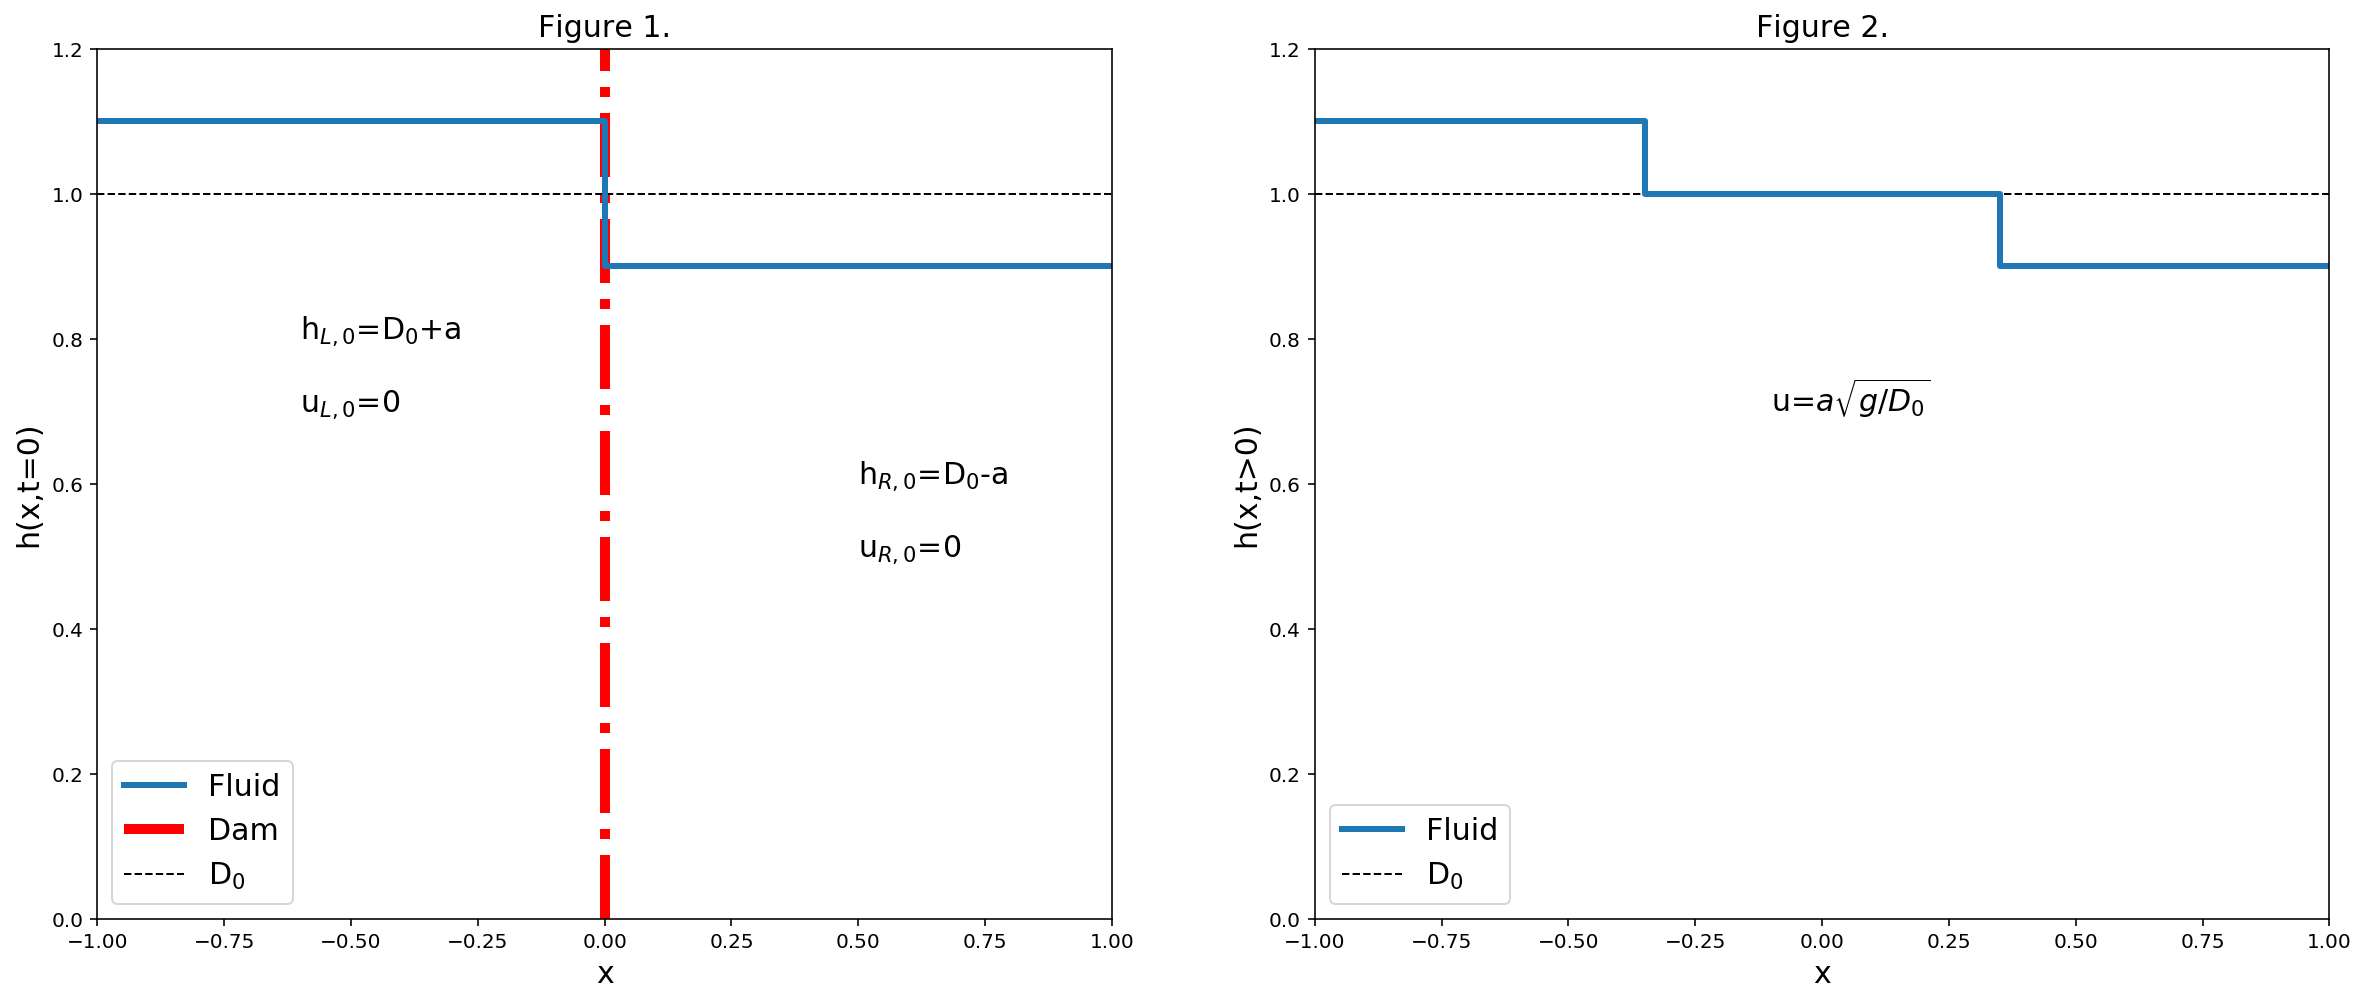

In [3]:
# initial conditions figure
D = 1.0
a = 0.1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot([-1,0,0,1],[D+a,D+a,D-a,D-a],linewidth=3,label='Fluid')
plt.vlines(0,0,1.25,linewidth=5,linestyle='-.',color='r',label='Dam')
plt.hlines(D,-1,1,linewidth=1,linestyle='--',color='k',label='D$_0$')
plt.legend(loc='lower left',fontsize=15)
plt.text(-0.6,0.8,'h$_{L,0}$=D$_0$+a',fontsize=15)
plt.text(-0.6,0.7,'u$_{L,0}$=0',fontsize=15)
plt.text(0.5,0.6,'h$_{R,0}$=D$_0$-a',fontsize=15)
plt.text(0.5,0.5,'u$_{R,0}$=0',fontsize=15)
plt.ylabel('h(x,t=0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-1,1,0,1.2])
plt.title('Figure 1.',fontsize=15)

D = 1.0
a = 0.1
plt.subplot(1,2,2)
plt.plot([-1,-0.35,-0.35,0.35,0.35,1],[D+a,D+a,D,D,D-a,D-a],linewidth=3,label='Fluid')
plt.hlines(D,-1,1,linewidth=1,linestyle='--',color='k',label='D$_0$')
plt.legend(loc='lower left',fontsize=15)
plt.text(-0.1,0.7,'u=$a\sqrt{g/D_0}$',fontsize=15)
plt.ylabel('h(x,t>0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-1,1,0,1.2])
plt.title('Figure 2.',fontsize=15)

[-1, 1, 0, 1.0]

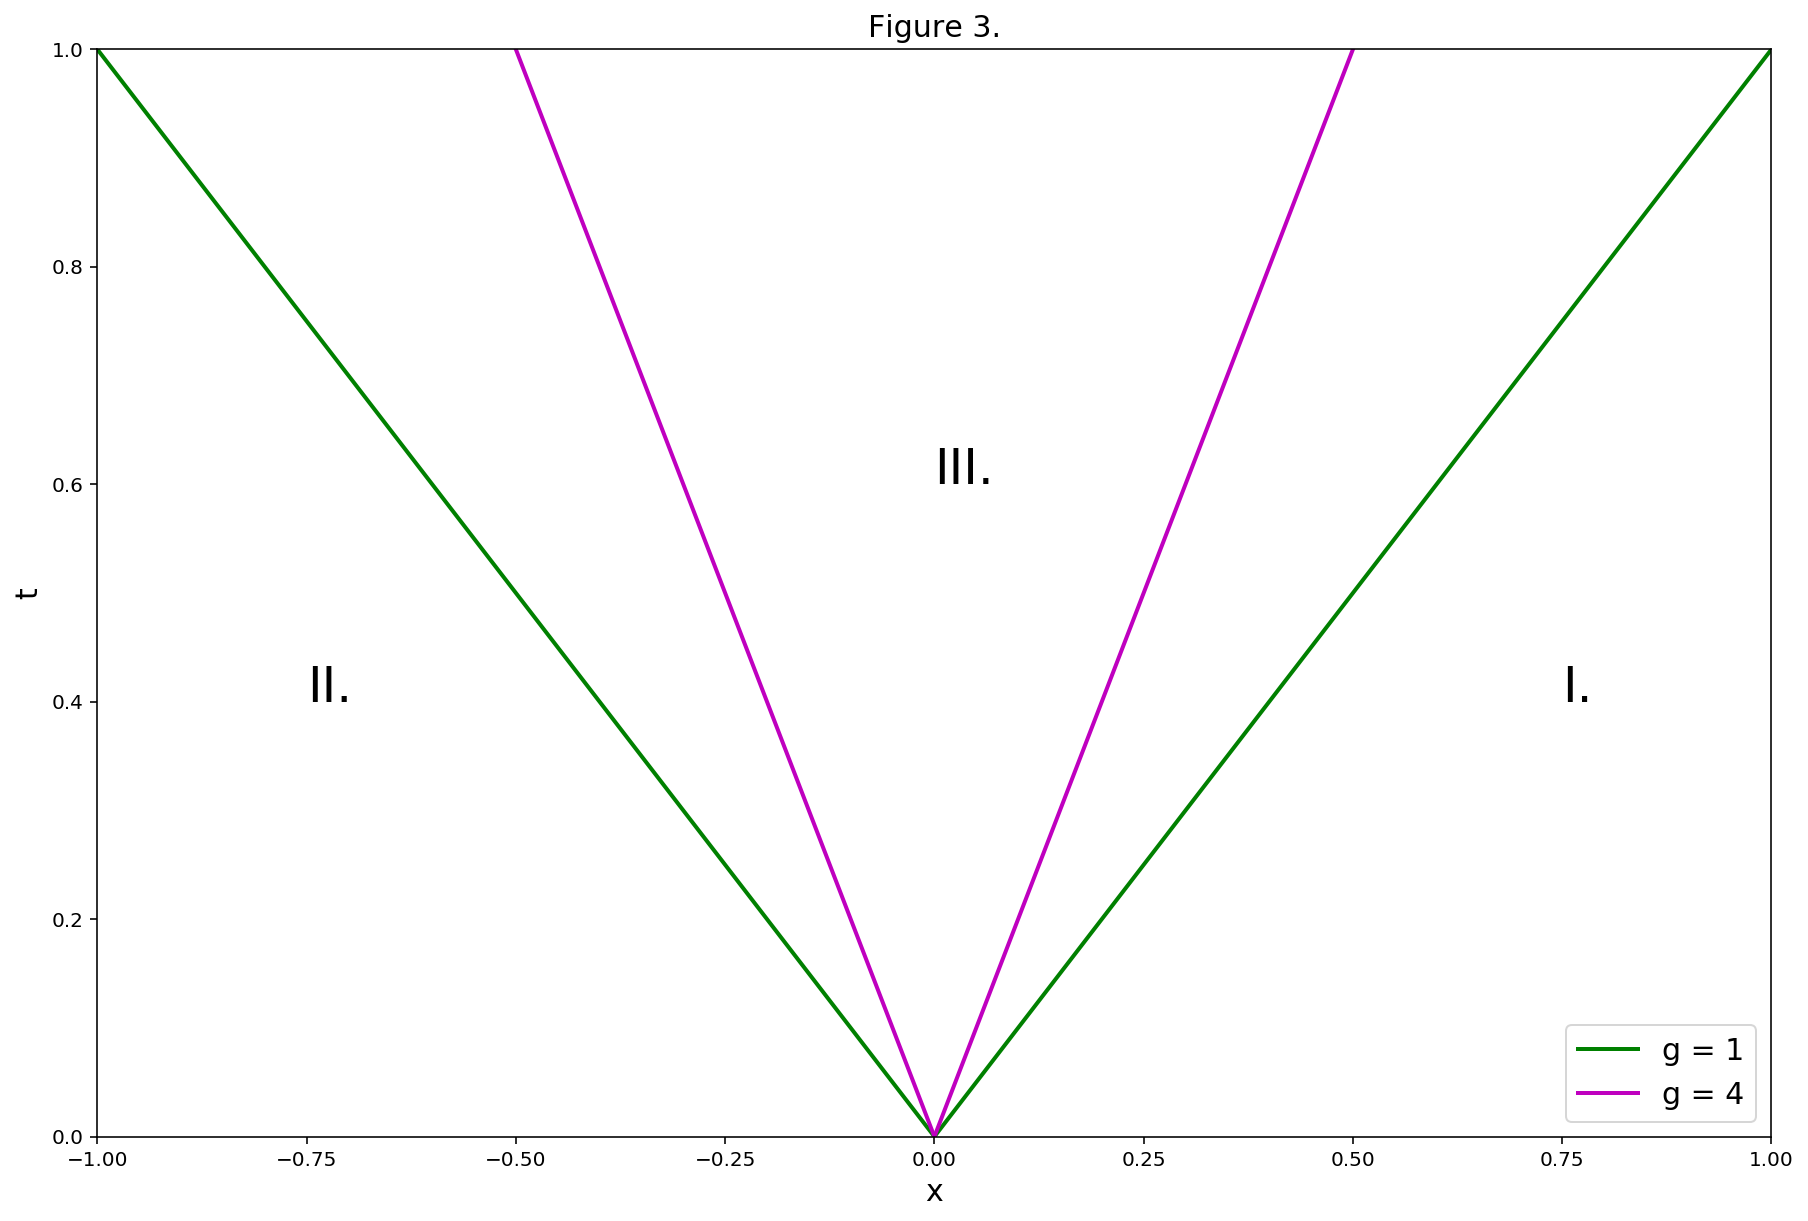

In [4]:
# visualizing the problem in the characteristic plane
xR = np.linspace(0,1.0,10)
xL = np.linspace(0,-1.0,10)
t = np.linspace(0,1.0,10)
plt.figure(figsize=(15,10))
plt.xlabel('x', fontsize=15)
plt.ylabel('t', fontsize=15)
for g,color in zip([1.0,4.0],['g','m']):
    v = np.sqrt(g*D) 
    plt.plot(xR, t*v, color=color, linewidth=2,label='g = %.0f'%g)
    plt.plot(xL, t*v, color=color, linewidth=2)
plt.text(0.75, 0.4, 'I.', fontsize=25)
plt.text(-0.75, 0.4, 'II.', fontsize=25)
plt.text(0.0, 0.6, 'III.', fontsize=25)
plt.title('Figure 3.',fontsize=15)
plt.legend(loc='lower right',fontsize=15)
plt.axis([-1,1,0,1.0])

In [5]:
# exact solution for h(x,t) and u(x,t)
def h(x,t,h0,u0,t0,D0,a,g):
    # first sort out which x fall within which region (I,II,III) for the given time
    
    # Characteristic Velocities
    vp = u0 + np.sqrt(g*D0)
    vm = u0 - np.sqrt(g*D0)
    
    bL = vm*t
    bR = vp*t
    
    mI = np.where(x>bR)[0]
    mII = np.where(x<bL)[0]
    mIII = np.intersect1d(np.where(x<=bR)[0],np.where(x>=bL)[0])
    
    hx,ux = np.zeros(len(x)), np.zeros(len(x))
    
    # Region II (R):
    hx[mII] = D0+a
    ux[mII] = 0
    
    # Region III (C):
    hx[mIII] = D0
    ux[mIII] = a*np.sqrt(g/D0)
    
    # Region I (L):
    hx[mI] = D0-a
    ux[mI] = 0

    return hx, ux



   

[-2.0, 2.0, -0.05, 0.2]

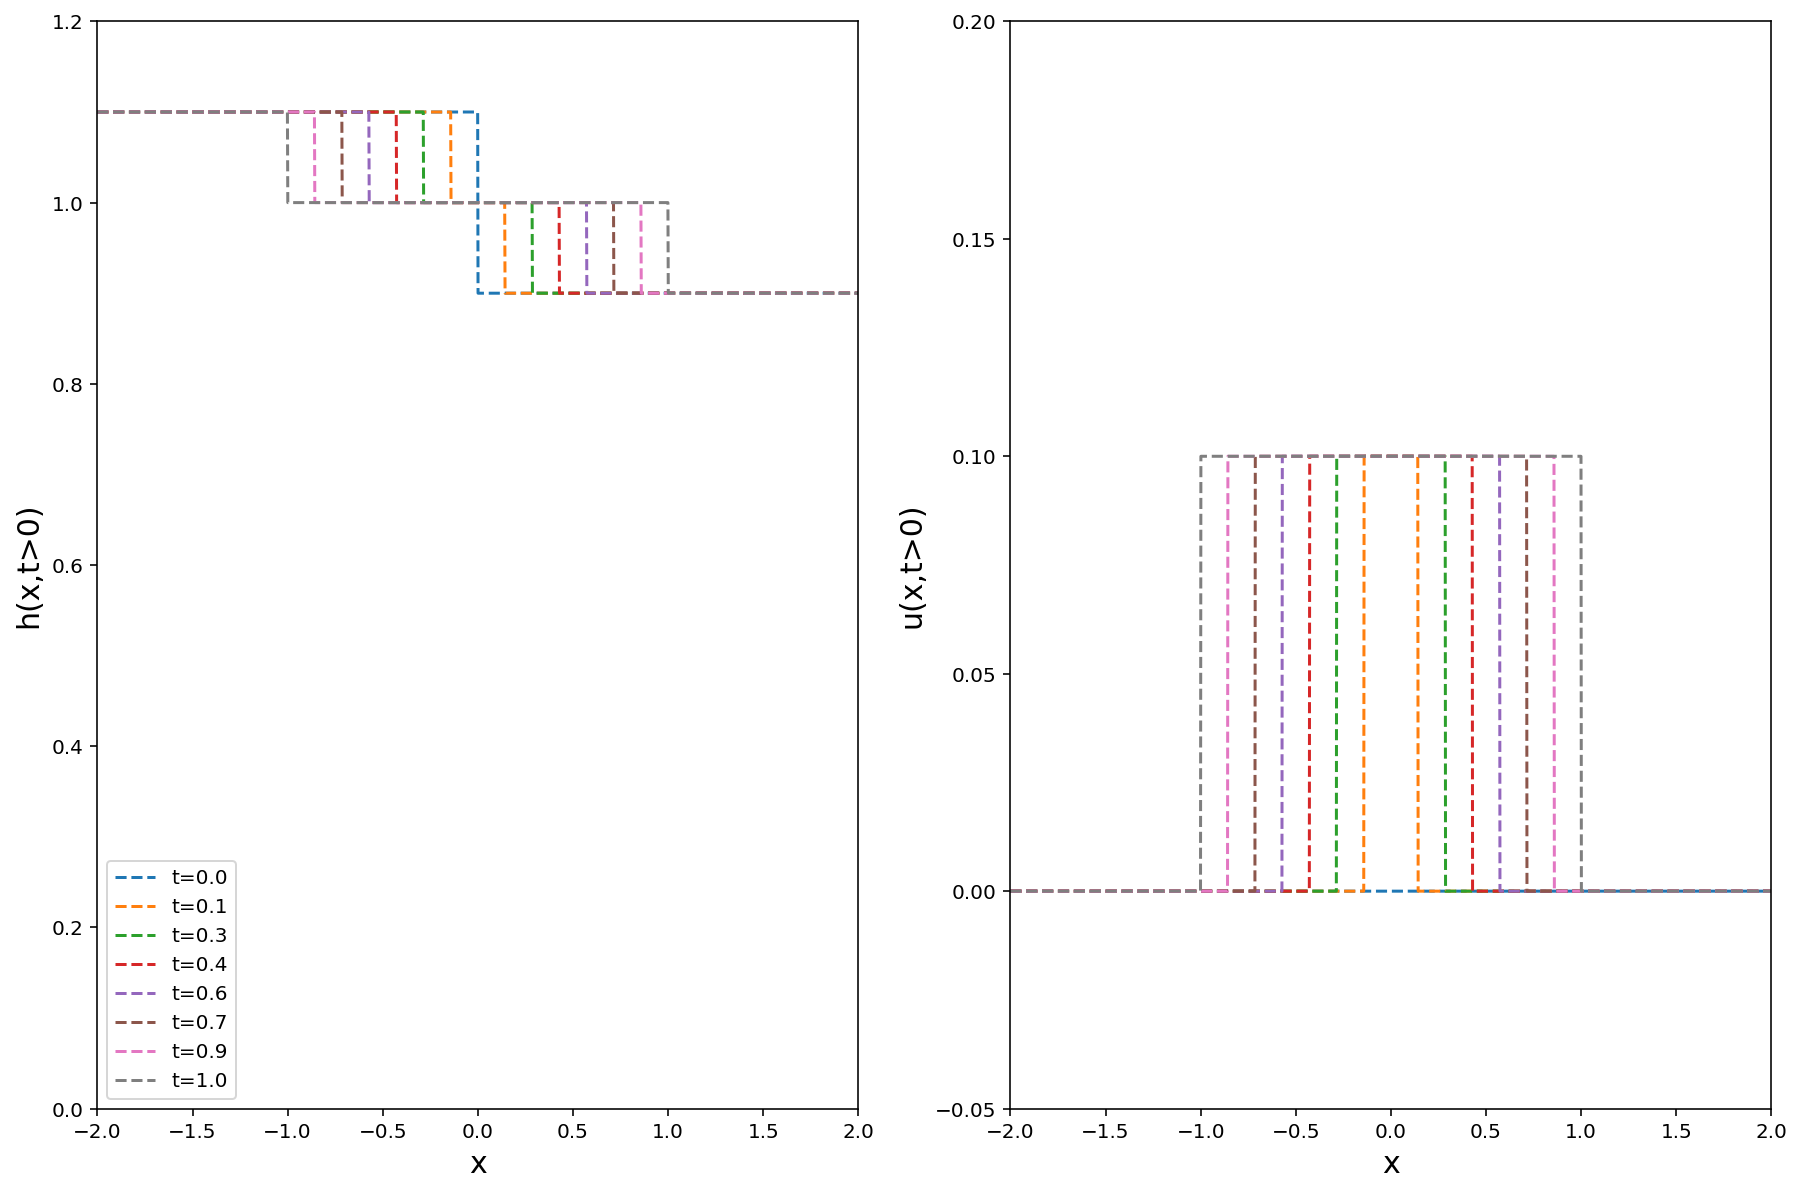

In [11]:
# make a plot with h(x,t) and u(x,t) for several t
u0 = 0.0
D0 = 1.0
a = 0.1
t0 =0.0
g = 1.0
h0 = np.concatenate((np.zeros(50)+D0+a,np.zeros(50)+D0-a))
x = np.linspace(-10.0,10.0,10000)

plt.figure(figsize=(15,10))
for t in np.linspace(0.0,1.0,8):
    ht,ut = h(x,t,h0,u0,t0,D0,a,g)
    plt.subplot(1,2,1)
    plt.plot(x,ht,linestyle='--',label='t=%.1f'%t)
    plt.subplot(1,2,2)
    plt.plot(x,ut,linestyle='--')

plt.subplot(1,2,1)
plt.ylabel('h(x,t>0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-2,2,0,1.2]) 
plt.legend(loc='lower left')
plt.subplot(1,2,2)
plt.ylabel('u(x,t>0)',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.axis([-2.0,2.0,-0.05,0.2]) 

# General Dam-break Problem
In general, the dam-break problem consists of a rarefaction wave and a shock. The two shock solution given above only applies only in the perturbative case as it does not satisfy the Lax entropy condition for this system (https://hal.archives-ouvertes.fr/hal-00959087/document).
<br /><br />
A shockwave is the discontinuous solution to the Riemann Problem. It forms in a nonlinear system of equations, for which the Jump Conditions are: <br />
$s(q_* - q) = f(q_*) - f(q)$
<br />
where s is the speed of the shock.
<br />
When the shallow water equations are plugged into the jump conditions, the system of algebraic equations are (Rankine-Hugoniot condtions):
$s(h_* - h) = h_*u_* - hu$
<br />
$s(h_*q_* - hu) = h_*u_*^2 - hu^2 + \frac{1}{2}g(h_*^2 - h^2)$

Solving for the unknowns, the shockwave solution is: <br />
$u(h) = u_* \pm (h_* - h)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_*})}$ 
<br />
$s(h) = (h_*u_* - hu)/(h_* - h)$
<br /><br />
The rarefaction wave is the continuous solution to the Riemann Problem. The rarefaction waves will be self-similar so that: <br />
$q(x, t) = q(\frac{x}{t})$
<br />
<br />
We introduce $\it{integral\; curves}$ as the paths in $\bf{q}$-space which have their tangent vectors at each point in the same direction as the eigenvectors of the $\bf{W}_0$ matrix above. The rarefaction waves will follow these curves. For the $\bf{V}_+$ eigenvector we have the relation: <br /><br />
$\bf{q}\prime(\xi)  = \bf{V}_+(\bf{q}) $
<br />
where $\xi$ parameterizes the curve. This differential relation yields: <br /><br />
$q_1\prime = 1$
<br />
$q_2\prime = \frac{q_2}{q_1} + \sqrt{g q_1}$
<br />
We see that $\xi = h$. If we denote one point on the curve by $\bf{q}$ = $(h_*, u_* h_*)$, we can solve the second differential equation to give:<br />
$q_2 = \xi u_* + 2\xi(\sqrt{g h_*} + \sqrt{g \xi})$
<br />
equivalently: <br />
$u = u_* - 2(\sqrt{g h_*} - \sqrt{g \xi})$
<br />
The $\bf{V}_-$ integral curve similarly has: <br />
$u = u_* + 2(\sqrt{g h_*} - \sqrt{g \xi})$
<br /> <br />


Combining the rarefaction wave results with the shock results above, we arrive at the general Riemann Solver for the Shallow Water Equations: <br />

$\phi_l(h) =\begin{cases}
    u_l + 2(\sqrt{gh_l} - \sqrt{gh}),& \text{if } h\lt h_l\\
    u_l - (h-h_l)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_l})}, & \text{if } h\gt h_l
\end{cases}
$ <br />

$\phi_r(h) =\begin{cases}
    u_r - 2(\sqrt{gh_r} - \sqrt{gh}),& \text{if } h\lt h_r\\
    u_r + (h-h_r)\sqrt{\frac{g}{2}(\frac{1}{h} + \frac{1}{h_r})}, & \text{if } h\gt h_r
\end{cases}
$ <br />
Here, $(h_l, h_lu_l)$ and $(h_r, h_ru_r)$ represent the state of the system on the left and right side of the dam, respectively, at $t$=0. We use these equations to solve for the state of the system in between the rarefaction wave and the shock, which we denote $(h_m, h_mu_m)$. The $\phi$ functions give $u_m$ for a given value of $h$. In particular, $\phi_l(h)$ gives $u_m$ such that the middle zone is physically correctly matched to the left side of the dam through a left-travelling wave. $\phi_r(h)$ does the same for the right side. We solve for $h_m$ that gives $\phi_r(h) = \phi_l(h)$. The structure (i.e. width) of the rarefaction fan can figured out from the eigenvalue speeds $V_-$ and $V_+$ from above. The height of the water in the rarefaction fan comes from the theory of $\it{simple\; waves}$. We quote the results from LeVeque (2002):<br /><br />
$h = \frac{1}{9g}(A-\xi)^2$
<br /><br />
where $\xi=x/t$ and $A=u_l + 2\sqrt{gh_l}$. The rarefaction wedge is located between $\xi_1=u_l-\sqrt{g h_l}$ and $\xi_2=u_m-\sqrt{g h_m}$. The velocity of the water in the rarefaction wedge is found from the Riemann invariants: <br />
$u + \frac{2}{3}(A-\xi) =  \rm{const}, \;\rm{for}\;V_-$ <br />
$u - \frac{2}{3}(A-\xi) =  \rm{const}, \;\rm{for}\;V_+$
<br />
We see that the speed is linear in position whereas the height is quadratic. <br />

In [1]:
from scipy.optimize import fsolve

def phi_l(h, u_l, h_l, g):
    if h < h_l:
         return u_l + 2*(np.sqrt(g*h_l) - np.sqrt(g*h))
    else:
        return u_l - (h-h_l)*np.sqrt(g/2*(1/h + 1/h_l))
def phi_r(h, u_r, h_r, g):
    if h < h_r:
        return u_r - 2*(np.sqrt(g*h_r)-np.sqrt(g*h))
    else:
        return u_r + (h-h_r)*np.sqrt(g/2*(1/h + 1/h_r))


def dambreak(x, t, h_r, u_r, h_l, u_l, g):
    # will solve the general dam-break/shock-tube Riemann problem with initial conditions h_r/u_r and h_l/u_l as the
    # height and velocity of the water on either side of the dam at t=0. x=0 will define the location of the dam.
    # x will be an array of positions at which to evaluate the state of the system and t will be a single time
    
    h = np.ones((np.shape(x))).flatten()
    u = np.ones((np.shape(x))).flatten()
    
    # first step is to solve for the height and speed of the water in the middle zone
    f = lambda h: phi_l(h, u_l, h_l, g) - phi_r(h, u_r, h_r, g)
    h_m = fsolve(f, 0.5*(h_l+h_r)) # solve for the h that gives phi_r = phi_l
    u_m = phi_r(h_m, u_r, h_r, g)
    
    if h_l > h_r:

        # the shock moves at 
        s = (h_r*u_r - h_m*u_m)/(h_r-h_m)
        h[x > s*t] = h_r # haven't been disturbed yet
        u[x > s*t] = u_r
        
        # rarefaction fan boundaries
        xi_1 = u_l - np.sqrt(g*h_l)
        xi_2 = u_m - np.sqrt(g*h_m)
        
        h[(x > xi_2*t) & (x <= s*t)] = h_m
        u[(x > xi_2*t) & (x <= s*t)] = u_m
        
        h[x < xi_1*t] = h_l # haven't been disturbed yet
        u[x < xi_1*t] = u_l
        
        A = u_l + 2*np.sqrt(g*h_l)
        
        # the rarefaction fan solution
        h[(x > xi_1*t) & (x <= xi_2*t)] = 1./9/g*(A-x[(x > xi_1*t) & (x <= xi_2*t)]/t)**2
        const = u_m + 2./3*(A-xi_2)
        u[(x > xi_1*t) & (x <= xi_2*t)] = const - 2./3 * (A - x[(x > xi_1*t) & (x <= xi_2*t)]/t)
       
    elif h_r > h_l:

        # the shock moves at 
        s = (h_l*u_l - h_m*u_m)/(h_l-h_m)
        h[x < s*t] = h_l # haven't been disturbed yet
        u[x < s*t] = u_l

        # rarefaction fan boundaries
        xi_1 = u_r + np.sqrt(g*h_r)
        xi_2 = u_m + np.sqrt(g*h_m)

        h[(x < xi_2*t) & (x >= s*t)] = h_m
        u[(x < xi_2*t) & (x >= s*t)] = u_m
        
        h[x > xi_1*t] = h_r # haven't been disturbed yet
        u[x > xi_1*t] = u_r
        
        
        A = u_r - 2*np.sqrt(g*h_r)
        
        # the rarefaction fan solution
        h[(x < xi_1*t) & (x >= xi_2*t)] = 1./9/g*(A-x[(x < xi_1*t) & (x >= xi_2*t)]/t)**2
        const = u_m - 2./3*(A+xi_2)
        u[(x < xi_1*t) & (x >= xi_2*t)] = const + 2./3 * (A + x[(x < xi_1*t) & (x >= xi_2*t)]/t)
        
        
    return h, u
        
    

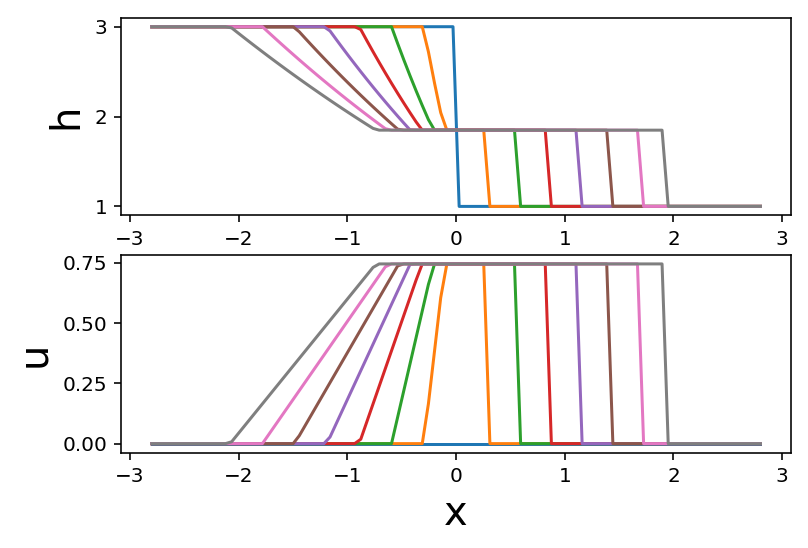

In [7]:
x = np.linspace(-2.8,2.8,100) 
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for t in np.linspace(0,1.2,8):
    h, u = dambreak(x, t, 1, 0, 3, 0, 1)
    ax1.plot(x, h)
    ax1.set_ylabel('h', fontsize=20)
    ax2.plot(x, u)
    ax2.set_ylabel('u', fontsize=20)
    ax2.set_xlabel('x', fontsize=20)
plt.show()

# Some Notes
"A Riemann problem is a specific initial value problem composed of a conservation equation together with piecewise constant initial data which has a single discontinuity in the domain of interest." -wikipedia

"For a first-order PDE (partial differential equation), the method of characteristics discovers curves (called characteristic curves or just characteristics) along which the PDE becomes an ordinary differential equation (ODE). Once the ODE is found, it can be solved along the characteristic curves and transformed into a solution for the original PDE."

"The Sod shock tube problem, named after Gary A. Sod, is a common test for the accuracy of computational fluid codes, like Riemann solvers, and was heavily investigated by Sod in 1978.

The test consists of a one-dimensional Riemann problem with the following parameters, for left and right states of an ideal gas

$\left( \begin{array}{c}\rho_L\\P_L\\v_L\end{array}\right)=\left( \begin{array}{c}1.0\\1.0\\0.0\end{array} \right),$ 

$\left( \begin{array}{c}\rho_R\\P_R\\v_R\end{array}\right)=\left( \begin{array}{c}0.125\\0.1\\0.0\end{array}\right)$

The time evolution of this problem can be described by solving the Euler equations, which leads to three characteristics, describing the propagation speed of the various regions of the system. Namely the rarefaction wave, the contact discontinuity and the shock discontinuity. If this is solved numerically, one can test against the analytical solution, and get information how well a code captures and resolves shocks and contact discontinuities and reproduce the correct density profile of the rarefaction wave.
"